In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [263]:
df = pd.read_csv('C:\\Users\\Rajeev kumar\\Desktop\\Bank customer churn prediction\\data\\bank data.csv')
df.sample(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
6252,15687492,596,Germany,Male,32,3,96709.07,2,0,0,41788.37,0
4684,15736963,623,France,Male,43,1,0.00,2,1,1,146379.30,0
1731,15721730,601,Spain,Female,44,4,0.00,2,1,0,58561.31,0
4742,15762134,506,Germany,Male,59,8,119152.10,2,1,1,170679.74,0
4521,15648898,560,Spain,Female,27,7,124995.98,1,1,1,114669.79,0
6340,15659064,790,Spain,Male,37,8,0.00,2,1,1,149418.41,0
576,15761986,439,Spain,Female,32,3,138901.61,1,1,0,75685.97,0
5202,15713354,597,Germany,Female,22,6,101528.61,1,1,0,70529.00,1
6363,15593454,678,Spain,Female,40,4,113794.22,1,1,0,16618.76,0
439,15690134,464,Germany,Female,42,3,85679.25,1,1,1,164104.74,0


In [264]:
df.shape

(10000, 12)

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [266]:
df.isnull().mean() * 100

customer_id         0.0
credit_score        0.0
country             0.0
gender              0.0
age                 0.0
tenure              0.0
balance             0.0
products_number     0.0
credit_card         0.0
active_member       0.0
estimated_salary    0.0
churn               0.0
dtype: float64

In [267]:
pd.DataFrame({'Data':df.shape[0],
              'No. of null value':df.isnull().sum(),
              'Unique value ':df.nunique()
})

,Data,No. of null value,Unique value
customer_id,10000,0,10000
credit_score,10000,0,460
country,10000,0,3
gender,10000,0,2
age,10000,0,70
tenure,10000,0,11
balance,10000,0,6382
products_number,10000,0,4
credit_card,10000,0,2
active_member,10000,0,2


In [268]:
df.duplicated().sum()

0

In [269]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Top insights:
- Dataset contains 10,000 customers with no missing numerical values.
- Average credit score is ~650 and average age is ~39 years.
- Customers have an average tenure of 5 years.
- Many customers have zero account balance, indicating inactive or new accounts.
- Most customers use 1–2 products.
- About 70% have a credit card and ~51% are active members.
- Estimated salary is widely distributed with a mean around 100k.
- Churn rate is ~20%, showing moderate class imbalance.

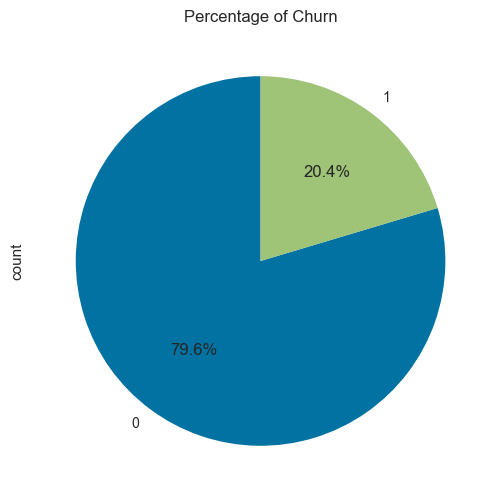

In [270]:
plt.figure(figsize=(6, 6))
df['churn'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Churn')
plt.show()

In [271]:
df.describe(include="object")


,country,gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [272]:
(df['age'] < 10).sum()

0

In [273]:
df['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

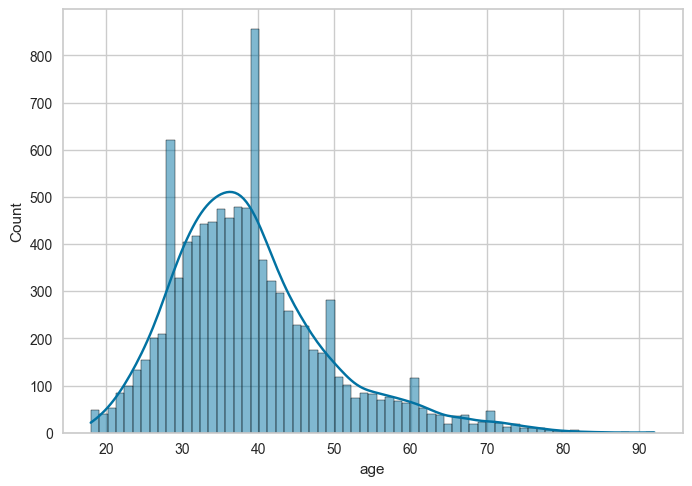

In [274]:
sns.histplot(df['age'], kde=True)

- Customer ages are mostly concentrated between 28 and 45 years.
- The distribution is right-skewed, with fewer customers at higher ages.
- Very few customers are above 70, indicating seniors form a small segment.


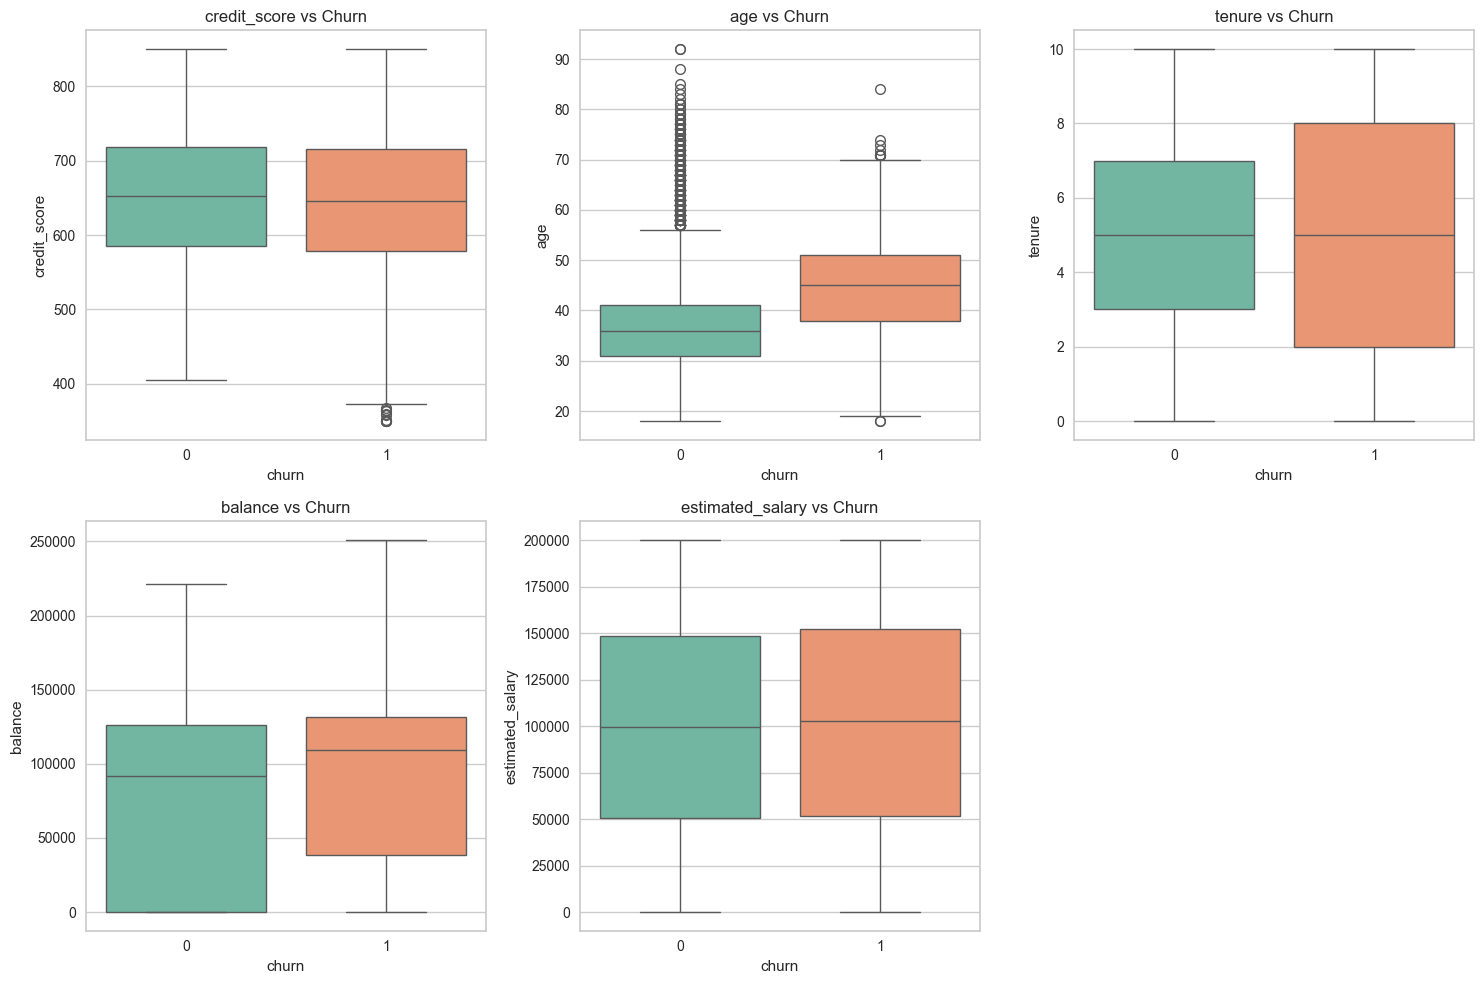

In [275]:
num_cols = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='churn', y=col, data=df, hue='churn', palette='Set2', legend=False)
    plt.title(f'{col} vs Churn')

plt.tight_layout()
plt.show()


Age vs Churn:- age shows a clear separation, making it an important churn factor.
- Customers who left are generally older than non-churn customers.
- Median age of churned customers is higher than non-churned customers.
- Younger customers (around 30–35) are more likely to stay with the bank.

Balance vs Churn:-
- Churned customers tend to have higher account balances.
- Non-churned customers include many with zero or very low balance.
- Customers with more money in the bank are more likely to churn, possibly due to better alternatives or higher expectations.

Credit Score vs churn:
-  Most customers have credit scores between ~600 and 720.
- The median credit score is around 650, indicating an average credit profile.
- A few low-end outliers are present, representing customers with very poor credit scores.

[]

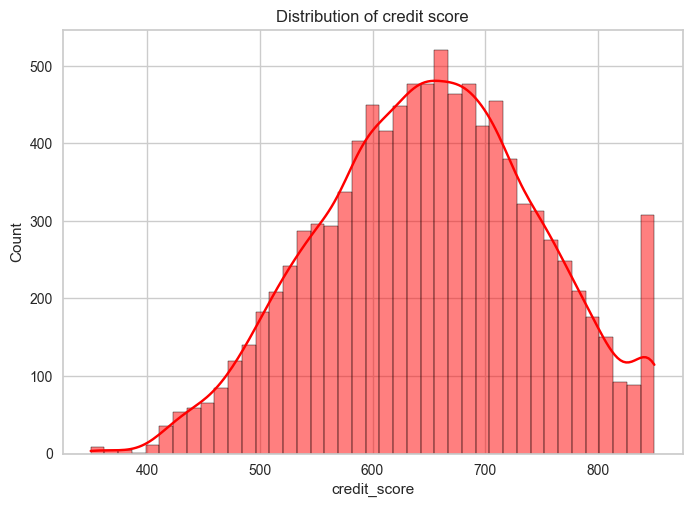

In [276]:
sns.histplot(df['credit_score'], kde=True, color='red')
plt.title('Distribution of credit score')
plt.plot()


- Most customers fall in the 600–750 range, indicating generally good credit health.

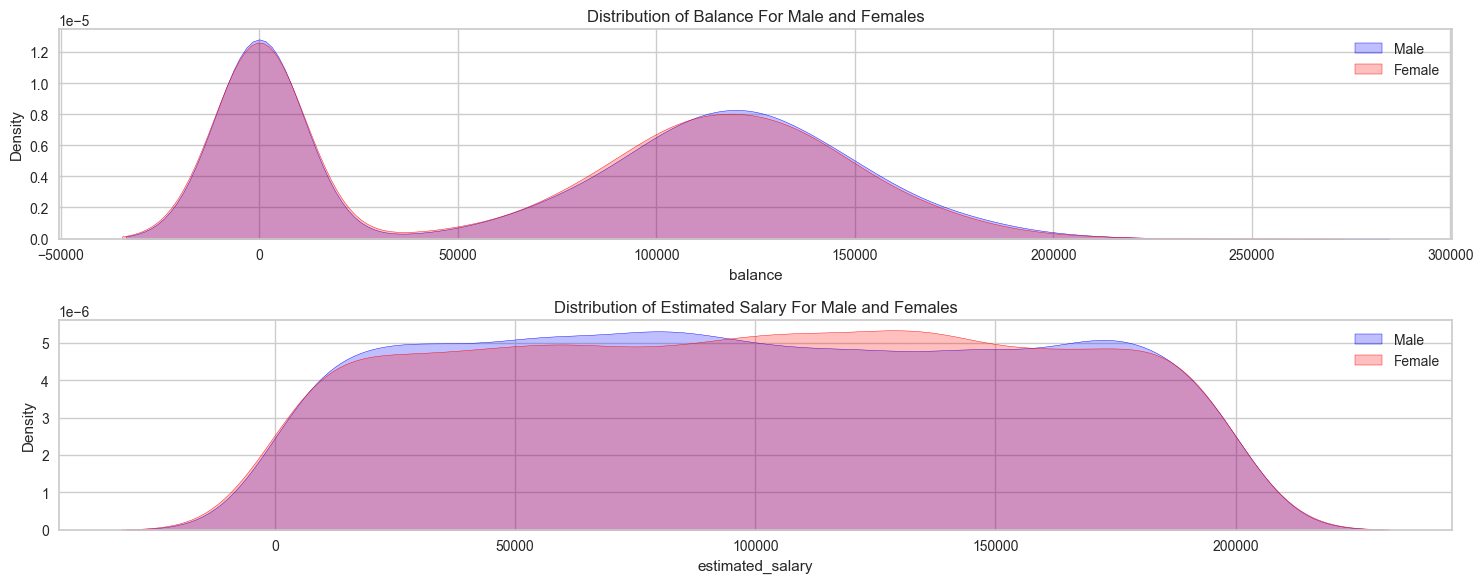

In [277]:
plt.figure(figsize=(15,6))

plt.subplot(2,1,1)

plt.title('Distribution of Balance For Male and Females')

sns.kdeplot(df[(df['gender'] == 'Male')]['balance'],color='blue',fill=True,label='Male')
sns.kdeplot(df[(df['gender'] == 'Female')]['balance'],color='red',fill=True,label='Female')
plt.legend()

plt.subplot(2,1,2)

plt.title('Distribution of Estimated Salary For Male and Females')

sns.kdeplot(df[(df['gender'] == 'Male')]['estimated_salary'],color='blue',fill=True,label='Male')
sns.kdeplot(df[(df['gender'] == 'Female')]['estimated_salary'],color='red',fill=True,label='Female')

plt.legend()
plt.tight_layout()
plt.show()

- Most Estimated salary in Male is 150k to 200k
- Most estimated salary in female is 100k to 150k

[]

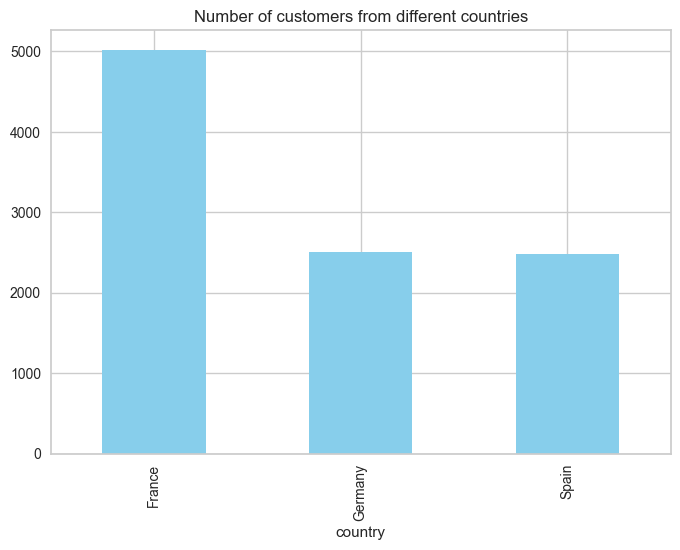

In [278]:
df['country'].value_counts().plot.bar(color='skyblue')
plt.title('Number of customers from different countries')
plt.plot()

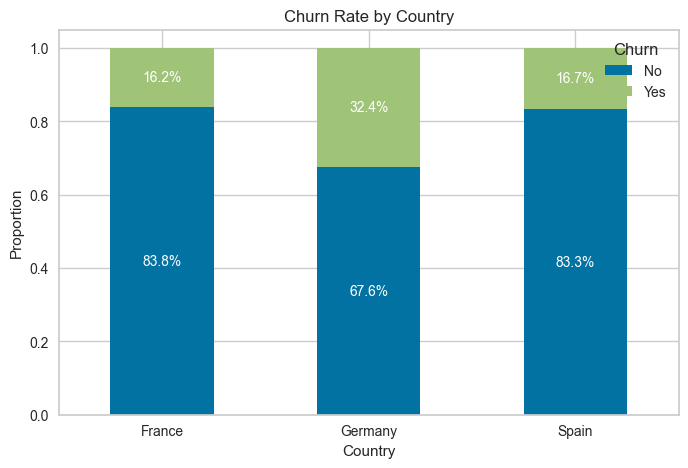

In [279]:
churn = pd.crosstab(df['country'], df['churn'], normalize='index')
ax = churn.plot(kind='bar', stacked=True, figsize=(8,5))

for i, country in enumerate(churn.index):
    cumulative = 0
    for j, col in enumerate(churn.columns):
        value = churn.loc[country, col]
        if value > 0:
            ax.text(
                i, 
                cumulative + value/2,  
                f"{value*100:.1f}%",
                ha='center', 
                va='center', 
                color='white', 
                fontsize=10
            )
        cumulative += value

plt.title("Churn Rate by Country")
plt.xlabel("Country")
plt.ylabel("Proportion")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.xticks(rotation=0)
plt.show()


- France: Very low churn rate (~16.2%), most customers stay (No).
- Germany: Higher churn rate (~32.4%), indicating a significant portion of customers leave.
- Spain: Similar to France, low churn (~16%).

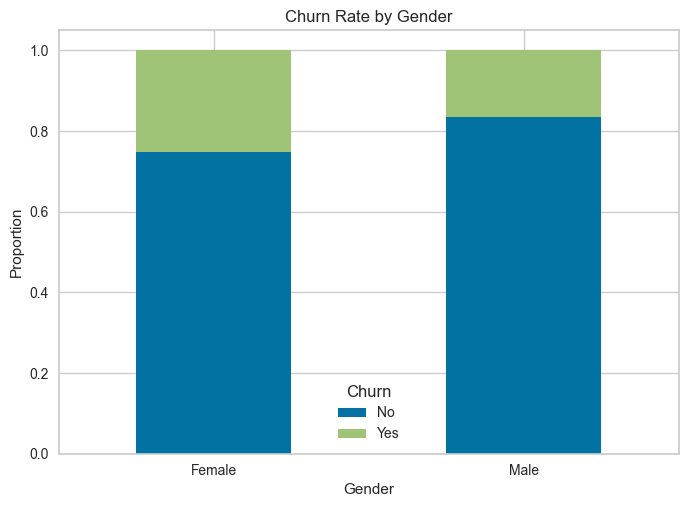

In [280]:
gt = pd.crosstab(df['gender'], df['churn'], normalize='index').plot(kind='bar', stacked=True)

gt.plot(kind='bar', stacked=True)
plt.title("Churn Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.xticks(rotation=0)
plt.show()

here female customers have higher churn rate

In [281]:
df['age_group'] = pd.cut(
    df['age'],
    bins=[18, 25, 35, 45, 55, 65, 100],
    labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
)


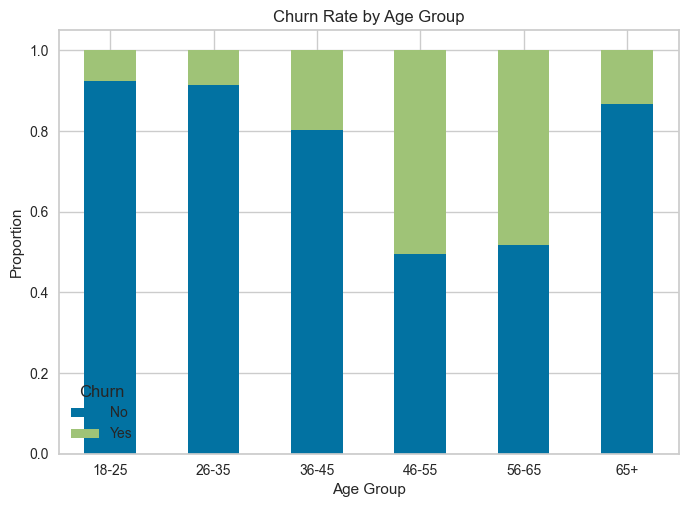

In [282]:
ct = pd.crosstab(df['age_group'], df['churn'], normalize='index')


ct.plot(kind='bar', stacked=True)
plt.title("Churn Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Proportion")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.xticks(rotation=0)
plt.show()


- Churn rate is lowest in younger customers (18–25, 26–35), most stay with the bank.
- Moderate churn is observed in the 36–45 age group.
- Higher churn rates appear in older age groups (46–55, 56–65).
- Customers 65+ have lower churn than 46–65, but still higher than younger groups.

Suggests age influences churn, with middle-aged customers (46–65) being more likely to leave.

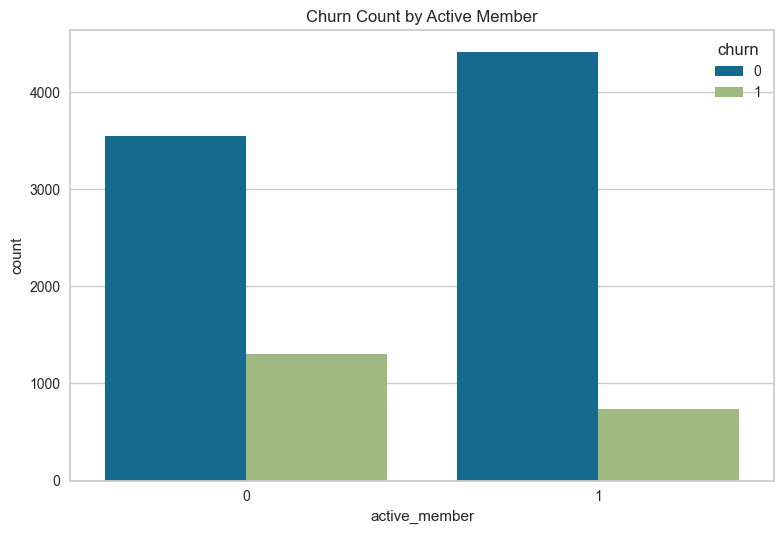

In [283]:
sns.countplot(x='active_member', hue='churn', data=df)
plt.title('Churn Count by Active Member')
plt.tight_layout()
plt.show()


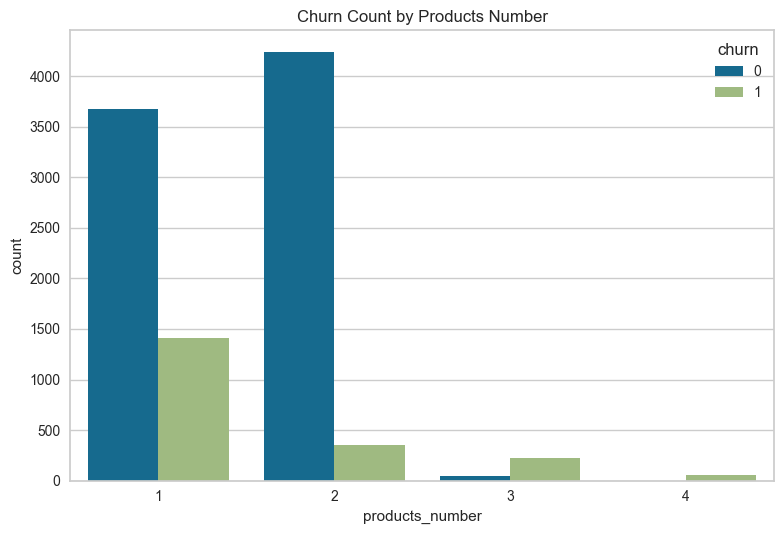

In [284]:
sns.countplot(x='products_number', hue='churn', data=df)
plt.title('Churn Count by Products Number')
plt.tight_layout()
plt.show()

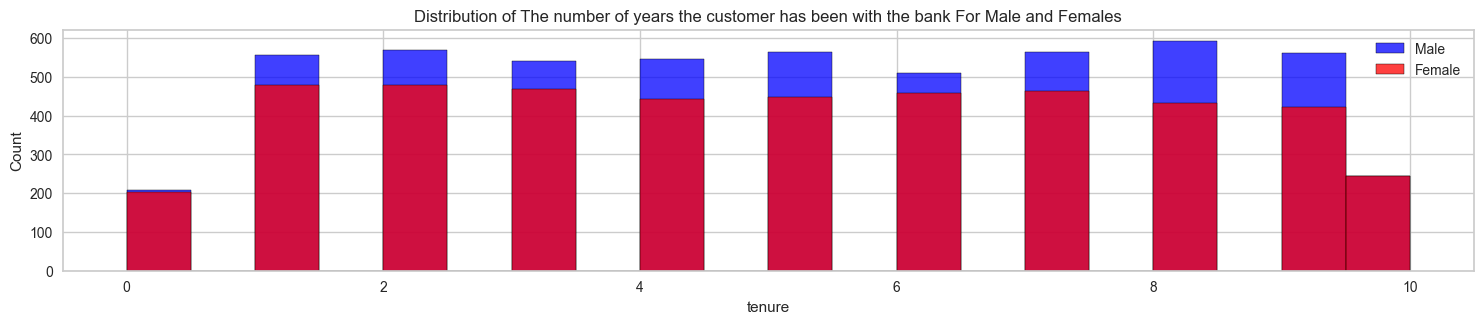

In [285]:
plt.figure(figsize=(15,6))

plt.subplot(2,1,1)

plt.title('Distribution of The number of years the customer has been with the bank For Male and Females')

sns.histplot(df[(df['gender'] == 'Male')]['tenure'],color='blue',bins=20,label='Male')
sns.histplot(df[(df['gender'] == 'Female')]['tenure'],color='red',bins=20,label='Female')

plt.legend()
plt.tight_layout()
plt.show()

- Most The number of years the Customer has been with the bank is Males
- The highest customer concentration for both genders lies between 1 to 9 years of tenure.
- Very few customers are present at 0 years and 10 years, indicating extremes are less common.

#### Detecting Outliers:-

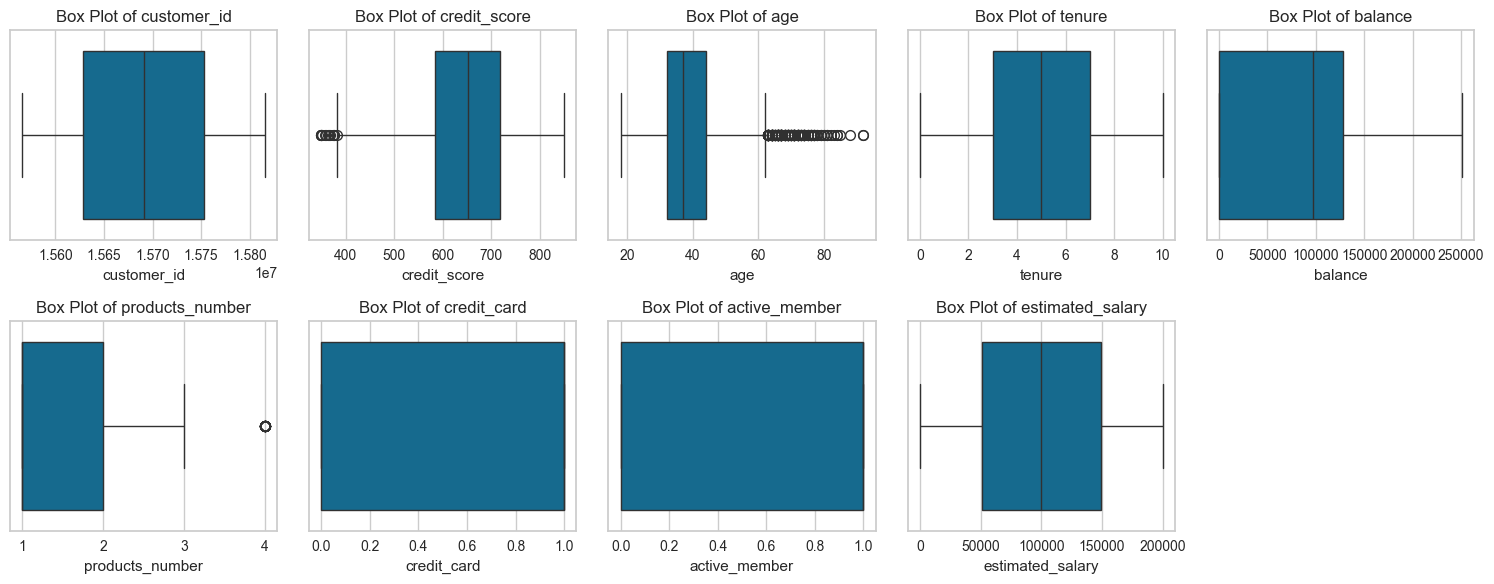

In [286]:
columns_list_numiric = df.select_dtypes('number').columns.to_list()[:-1]
plt.figure(figsize=(15, 6))

for i, col in enumerate(columns_list_numiric, 1):
    plt.subplot(2, 5, i)  
    sns.boxplot(x = df[col])
    plt.title(f"Box Plot of {col}")

plt.tight_layout() 
plt.show()

In [287]:

def detect_outliers_iqr(df, columns, threshold = 1.5):

    outlier_indices = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
        outlier_indices[col] = outliers
    
    return outlier_indices

outliers_iqr = detect_outliers_iqr(df, columns_list_numiric)

print(f"No. of outliers in columns:-- Total Data {len(df)}")
for col, indices in outliers_iqr.items():
    print(f"{col}: {len(indices)} {len(indices)*100/len(df)}%")

No. of outliers in columns:-- Total Data 10000
customer_id: 0 0.0%
credit_score: 15 0.15%
age: 359 3.59%
tenure: 0 0.0%
balance: 0 0.0%
products_number: 60 0.6%
credit_card: 0 0.0%
active_member: 0 0.0%
estimated_salary: 0 0.0%


##### Insights:
- These outliers are real bank customers, not errors
- High-risk users (old age, low credit score, many products) are most likely to churn
- Removing them would delete important churn patterns
- This creates bias and weakens the model
- We use capping to control extreme values while keeping customer information
- This makes the churn model more accurate and realistic

In [288]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,age_group
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,36-45
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,36-45
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,36-45
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,36-45
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,36-45


In [289]:
columns_lis = ['credit_score', 'age', 'products_number']
for col in columns_lis:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    
    df[col] = np.clip(df[col], lower, upper)

Capping does NOT hide risk
It removes noise and keeps signal

In [290]:
df['age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 62, 56, 26, 21, 55, 22, 30, 28,
       48, 52, 57, 47, 54, 20, 53, 59, 23, 60, 18], dtype=int64)

In [291]:
df['products_number'].value_counts()

products_number
1.0    5084
2.0    4590
3.0     266
3.5      60
Name: count, dtype: int64

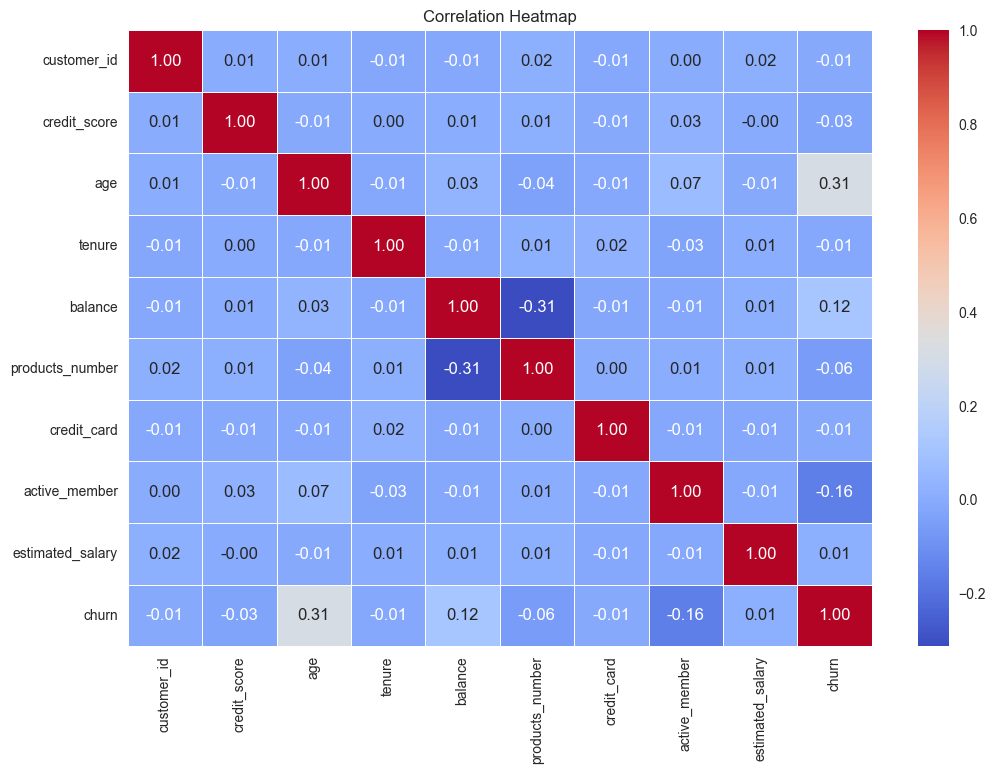

In [292]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix,
    annot=True,
    fmt=".2f",       
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap")
plt.show()

- credit_score (-0.027), products_number (-0.048), credit_card (-0.007), estimated_salary (0.012), tenure (-0.014): These features show minimal direct linear impact on churn.
- balance and products_number have a strong negative correlation (-0.304), suggesting customers with more products tend to have lower balances.
- age and active_member show some positive correlation (0.085), meaning older customers are slightly more likely to be active members.

### encoding

In [293]:
from sklearn.preprocessing import LabelEncoder
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df['country'] = LabelEncoder().fit_transform(df['country'])

In [294]:
df['age_group'] = np.select(
    [df['age'] <= 30, df['age'] <= 50, df['age'] > 50],
    [0, 1, 2]
)
#0- Young, 1-Middle, 2-Senior

In [295]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,age_group
0,15634602,619,0,1,42,2,0.00,1.0,1,1,101348.88,1,1
1,15647311,608,2,1,41,1,83807.86,1.0,0,1,112542.58,0,1
2,15619304,502,0,1,42,8,159660.80,3.0,1,0,113931.57,1,1
3,15701354,699,0,1,39,1,0.00,2.0,0,0,93826.63,0,1
4,15737888,850,2,1,43,2,125510.82,1.0,1,1,79084.10,0,1


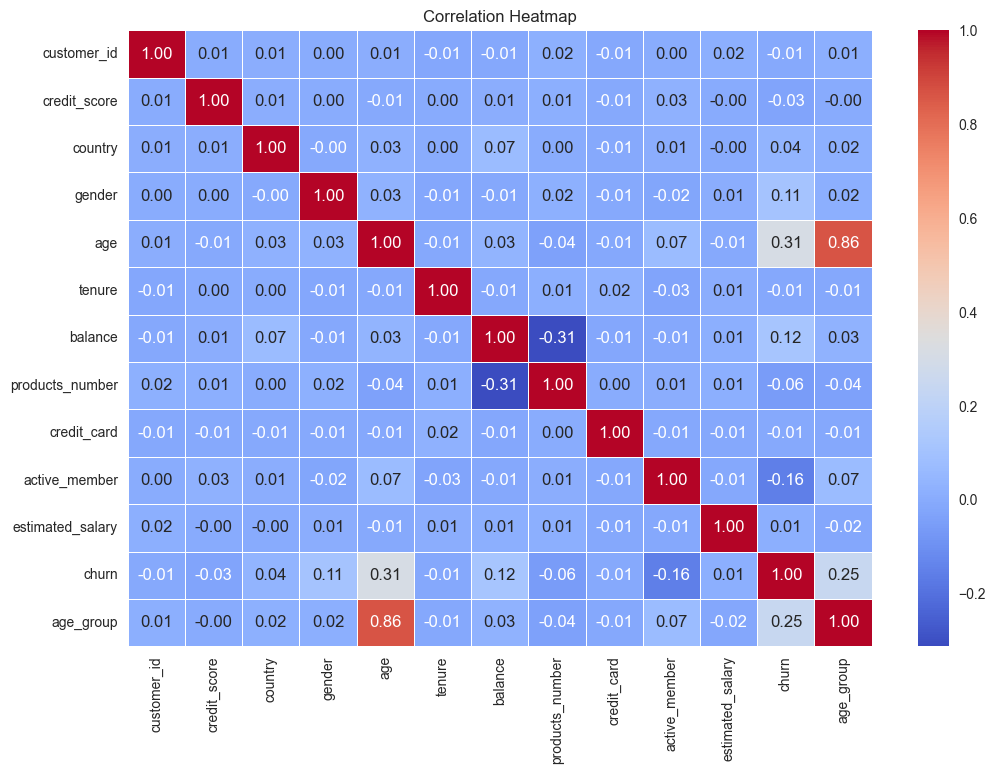

In [296]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix,
    annot=True,
    fmt=".2f",       
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap")
plt.show()

In [297]:

columns_to_drop = ['customer_id','age', 'credit_card', 'tenure', 'estimated_salary', 'products_number']
df = df.drop(columns=columns_to_drop)
df.head()


,credit_score,country,gender,balance,active_member,churn,age_group
0,619,0,1,0.00,1,1,1
1,608,2,1,83807.86,1,0,1
2,502,0,1,159660.80,0,1,1
3,699,0,1,0.00,0,0,1
4,850,2,1,125510.82,1,0,1


In [298]:
#checking multicolinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numerical features for VIF
X_vif = df

vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]

print(vif_data)

         feature       VIF
0   credit_score  6.595500
1        country  1.805506
2         gender  1.827853
3        balance  2.495412
4  active_member  2.116335
5          churn  1.415996
6      age_group  3.845306


credit_score VIF is acceptable....


### Model Training:-

In [366]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,recall_score, roc_auc_score, confusion_matrix, classification_report

In [367]:
X = df.drop('churn', axis=1)
y = df['churn']

In [368]:
numeric_cols = ['credit_score', 'balance', 'age_group']
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
X

,credit_score,country,gender,balance,active_member,age_group
0,-0.326878,0,1,-1.225848,1,0.125393
1,-0.440804,2,1,0.117350,1,0.125393
2,-1.538636,0,1,1.333053,0,0.125393
3,0.501675,0,1,-1.225848,0,0.125393
4,2.065569,2,1,0.785728,1,0.125393
...,...,...,...,...,...,...
9995,1.247373,0,0,-1.225848,0,0.125393
9996,-1.393640,0,0,-0.306379,1,0.125393
9997,0.605244,0,1,-1.225848,1,0.125393
9998,1.257730,1,0,-0.022608,0,0.125393


In [369]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [370]:
X_train

,credit_score,country,gender,balance,active_member,age_group
2151,1.060949,0,0,-1.225848,0,1.898985
8392,0.915952,1,0,0.410973,0,0.125393
5006,1.081662,1,1,0.599083,1,0.125393
4117,-0.927579,0,0,-1.225848,0,0.125393
7182,0.429177,1,0,0.545796,1,0.125393
...,...,...,...,...,...,...
4555,0.387749,2,1,-1.225848,0,0.125393
4644,0.636315,2,0,-1.225848,0,1.898985
8942,0.170254,0,1,-0.075311,1,0.125393
2935,0.377392,2,0,0.392704,0,0.125393


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "lightGBM": LGBMClassifier(random_state=42, n_estimators=100)
}

In [374]:

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None
    
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Recall": recall,
        "F1 Score": f1,
        "ROC-AUC": roc
    })

[LightGBM] [Info] Number of positive: 1630, number of negative: 6370
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000614 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 521
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203750 -> initscore=-1.363019
[LightGBM] [Info] Start training from score -1.363019


In [376]:
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="ROC-AUC", ascending=False))


                 Model  Accuracy    Recall  F1 Score   ROC-AUC
3    Gradient Boosting    0.8250  0.171990  0.285714  0.744606
0  Logistic Regression    0.8195  0.142506  0.243187  0.741672
5             CatBoost    0.8205  0.230958  0.343693  0.736984
6             lightGBM    0.8150  0.230958  0.336918  0.729308
4              XGBoost    0.8035  0.257985  0.348259  0.707444
2        Random Forest    0.7820  0.280098  0.343373  0.680799
1        Decision Tree    0.7470  0.341523  0.354592  0.597398


- Although Gradient Boosting achieved the highest ROC-AUC (0.744),
- CatBoost provided a strong balance between ROC-AUC (0.737) and stability.
- Decision Tree achieved the highest recall but was rejected due to poor
  generalization and low ROC-AUC.
- Final model selection was based on ROC-AUC and recall trade-offs


In [307]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [377]:
# Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.9, 1.0]
}

# XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.7, 0.9, 1.0],
    'scale_pos_weight': [1,3,3.91, 4]  # to handle class imbalance
}
# LightGBM
lgbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [31, 50, 70],
    'scale_pos_weight': [1,3,3.91, 4]  # to handle class imbalance
}
# CatBoost
cat_param_grid = {
    'iterations': [200, 400],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'scale_pos_weight': [1,3,3.91, 4]  # to handle class imbalance
}

In [378]:
models = {
    "GradientBoosting": (GradientBoostingClassifier(random_state=42), gb_param_grid),
    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), xgb_param_grid),
    "LightGBM": (LGBMClassifier(random_state=42), lgbm_param_grid),
    "CatBoost": (CatBoostClassifier(verbose=0, random_state=42), cat_param_grid)
}

In [379]:
best_models = {}
for name, (model, param_grid) in models.items():
    print(f"\nTuning {name}...")
    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring=make_scorer(roc_auc_score),
        cv=5,
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    print(f"Best ROC-AUC for {name}: {grid.best_score_:.4f}")
    print(f"Recall: {recall_score(y_test, grid.best_estimator_.predict(X_test)):.4f}")
    print(f"Best Params: {grid.best_params_}")


Tuning GradientBoosting...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best ROC-AUC for GradientBoosting: 0.6201
Recall: 0.2531
Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}

Tuning XGBoost...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best ROC-AUC for XGBoost: 0.6807
Recall: 0.5848
Best Params: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'scale_pos_weight': 3.91}

Tuning LightGBM...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[LightGBM] [Info] Number of positive: 1630, number of negative: 6370
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000789 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 521
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203750 -> initscor

In [380]:
#evaluate on Test Set
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None
    roc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    recall = recall_score(y_test, y_pred)
    print(f"{name} Test ROC-AUC: {roc:.4f}")
    print(f"{name} Test Recall: {recall:.4f}")


GradientBoosting Test ROC-AUC: 0.7199
GradientBoosting Test Recall: 0.2531
XGBoost Test ROC-AUC: 0.7385
XGBoost Test Recall: 0.5848
LightGBM Test ROC-AUC: 0.7363
LightGBM Test Recall: 0.5774
CatBoost Test ROC-AUC: 0.7484
CatBoost Test Recall: 0.6216


In [313]:
#checking imbalance ration of class
class_counts = df['churn'].value_counts()
imbalance_ratio = class_counts[0] / class_counts[1]
print(f"Imbalance ratio: {imbalance_ratio:.2f}")


Imbalance ratio: 3.91


### Applying automl(pycaret):
Experimenting multiple models.....

In [381]:
import pandas as pd
from pycaret.classification import *



In [ ]:
clf = setup(
    data=df,
    target="churn",
    
    normalize=True,
    normalize_method="zscore",

    fix_imbalance=True,

    remove_multicollinearity=True,
    multicollinearity_threshold=0.9,

    session_id=42,
    fold=5
)


,Description,Value
0,Session id,42
1,Target,churn
2,Target type,Binary
3,Original data shape,"(10000, 7)"
4,Transformed data shape,"(14148, 7)"
5,Transformed train set shape,"(11148, 7)"
6,Transformed test set shape,"(3000, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [382]:

best_model = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8201,0.7432,0.2959,0.6274,0.4003,0.3105,0.3417,0.1250
lightgbm,Light Gradient Boosting Machine,0.8170,0.7340,0.3169,0.5932,0.4120,0.3159,0.3380,0.1470
catboost,CatBoost Classifier,0.8171,0.7334,0.3114,0.5971,0.4085,0.3132,0.3367,1.5190
ada,Ada Boost Classifier,0.8047,0.7295,0.3422,0.5337,0.4159,0.3056,0.3169,0.0440
nb,Naive Bayes,0.6697,0.7221,0.6529,0.3392,0.4461,0.2432,0.2699,0.0100
qda,Quadratic Discriminant Analysis,0.6824,0.7213,0.6164,0.3446,0.4417,0.2442,0.2645,0.0070
xgboost,Extreme Gradient Boosting,0.8023,0.7154,0.3176,0.5244,0.3950,0.2855,0.2985,0.0710
lr,Logistic Regression,0.6403,0.7144,0.6606,0.3168,0.4281,0.2107,0.2411,0.3680
ridge,Ridge Classifier,0.6384,0.7144,0.6612,0.3155,0.4270,0.2088,0.2394,0.0080
lda,Linear Discriminant Analysis,0.6384,0.7144,0.6612,0.3155,0.4270,0.2088,0.2394,0.0080


In churn prediction, recall is often more important than accuracy, because missing a churner is costlier than wrongly flagging a loyal customer.


In [ ]:
#create base logistic regression
lr = create_model('lr')

#hyperparameter tuning
tuned_lr = tune_model(
    lr,
    optimize='Recall',
    n_iter=50,
    choose_better=True
)
evaluate_model(tuned_lr)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6314,0.6886,0.6408,0.3054,0.4136,0.1915,0.2195
1,0.6057,0.6739,0.5915,0.2781,0.3784,0.1415,0.1631
2,0.6400,0.6892,0.6338,0.3103,0.4167,0.1983,0.2248
3,0.6671,0.7577,0.7254,0.3468,0.4692,0.2685,0.3073
4,0.6171,0.7187,0.6224,0.2937,0.3991,0.1682,0.1938
5,0.6400,0.7428,0.7552,0.3323,0.4615,0.2482,0.2956
6,0.6571,0.7279,0.6434,0.3274,0.4340,0.2238,0.2501
7,0.6586,0.7216,0.6643,0.3322,0.4429,0.2343,0.2636
8,0.6157,0.6869,0.6364,0.2955,0.4035,0.1727,0.2004


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6314,0.6886,0.6408,0.3054,0.4136,0.1915,0.2195
1,0.6057,0.6739,0.5915,0.2781,0.3784,0.1415,0.1631
2,0.6400,0.6892,0.6338,0.3103,0.4167,0.1983,0.2248
3,0.6671,0.7577,0.7254,0.3468,0.4692,0.2685,0.3073
4,0.6171,0.7187,0.6224,0.2937,0.3991,0.1682,0.1938
5,0.6400,0.7428,0.7552,0.3323,0.4615,0.2482,0.2956
6,0.6571,0.7279,0.6434,0.3274,0.4340,0.2238,0.2501
7,0.6586,0.7216,0.6643,0.3322,0.4429,0.2343,0.2636
8,0.6157,0.6870,0.6364,0.2955,0.4035,0.1727,0.2004


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
lr = create_model('lr')
tuned_lr = tune_model(
    lr,
    optimize='Recall',
    n_iter=50,
    choose_better=True
)
evaluate_model(tuned_lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6314,0.6886,0.6408,0.3054,0.4136,0.1915,0.2195
1,0.6057,0.6739,0.5915,0.2781,0.3784,0.1415,0.1631
2,0.6400,0.6892,0.6338,0.3103,0.4167,0.1983,0.2248
3,0.6671,0.7577,0.7254,0.3468,0.4692,0.2685,0.3073
4,0.6171,0.7187,0.6224,0.2937,0.3991,0.1682,0.1938
5,0.6400,0.7428,0.7552,0.3323,0.4615,0.2482,0.2956
6,0.6571,0.7279,0.6434,0.3274,0.4340,0.2238,0.2501
7,0.6586,0.7216,0.6643,0.3322,0.4429,0.2343,0.2636
8,0.6157,0.6869,0.6364,0.2955,0.4035,0.1727,0.2004


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6314,0.6886,0.6408,0.3054,0.4136,0.1915,0.2195
1,0.6057,0.6739,0.5915,0.2781,0.3784,0.1415,0.1631
2,0.6400,0.6892,0.6338,0.3103,0.4167,0.1983,0.2248
3,0.6671,0.7577,0.7254,0.3468,0.4692,0.2685,0.3073
4,0.6171,0.7187,0.6224,0.2937,0.3991,0.1682,0.1938
5,0.6400,0.7428,0.7552,0.3323,0.4615,0.2482,0.2956
6,0.6571,0.7279,0.6434,0.3274,0.4340,0.2238,0.2501
7,0.6586,0.7216,0.6643,0.3322,0.4429,0.2343,0.2636
8,0.6157,0.6870,0.6364,0.2955,0.4035,0.1727,0.2004


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Both Logistic Regression and LightGBM achieved comparable performance with a mean recall of ~66% and ROC–AUC of ~0.71. Since the performance difference was negligible, Logistic Regression was selected as the final model due to its superior interpretability, stability across folds, and suitability for regulated banking environments. LightGBM was retained as a challenger model for churn risk ranking.